In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [35]:
GENE_FILE_TSC1 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/12611.csv"
GENE_FILE_TSC2 = "/cs/labs/michall/roeizucker/virt_env_install_test/ukbb_imputation_gene_effect_scores/5060.csv"
DISEASE_DATASET = "/cs/labs/michall/roeizucker/phewas_run/runs1/2440:2449/ukbb_dataset.csv"
PHEWAS_REESULTS_DIR = "/cs/labs/michall/roeizucker/phewas_run/results/"
REQUESTED_GENE = ["TSC1","TSC2","TBC1D7"]

In [41]:
genes_dict = {}
for symb in REQUESTED_GENE:
    genes_dict[symb] = [0,[]]
for filename in os.listdir(PHEWAS_REESULTS_DIR):
    f = os.path.join(PHEWAS_REESULTS_DIR, filename)
    # checking if it is a file
    try:
        df = pd.read_csv(f,nrows=500) 
    except:
        continue
    for symb in (df[df["fdr_significance"]]["symbol"]):
        if symb in REQUESTED_GENE:
            print(symb,filename)
            genes_dict[symb][0]+=1
            genes_dict[symb][1].append(filename)

TSC2 Phecode_750.13.csv
TBC1D7 Phecode_624.2_F.csv
TSC2 Phecode_295.2.csv
TSC2 Phecode_756.5_M.csv
TBC1D7 Phecode_624.2.csv


In [ ]:
# Congenital anomalies of mouth/tongue
# Atrophy of female genital tract
# Paranoid disorders
# Congenital osteodystrophies


In [42]:
genes_dict

{'TSC1': [0, []],
 'TSC2': [3,
  ['Phecode_750.13.csv', 'Phecode_295.2.csv', 'Phecode_756.5_M.csv']],
 'TBC1D7': [2, ['Phecode_624.2_F.csv', 'Phecode_624.2.csv']]}

In [6]:
disease_df = pd.read_csv(DISEASE_DATASET)


0.0    273652
1.0      1172
Name: Phecode_510.0, dtype: int64

In [12]:
TSC1_df = pd.read_csv(GENE_FILE_TSC1)
TSC2_df = pd.read_csv(GENE_FILE_TSC2)

In [10]:
disease_df["Phecode_510.0"].value_counts()

0.0    273652
1.0      1172
Name: Phecode_510.0, dtype: int64

In [17]:
disease_eid = list(disease_df[disease_df["Phecode_510.0"]==1].eid)

array([[<AxesSubplot:title={'center':'sample_id'}>,
        <AxesSubplot:title={'center':'dominant'}>],
       [<AxesSubplot:title={'center':'recessive'}>, <AxesSubplot:>]],
      dtype=object)

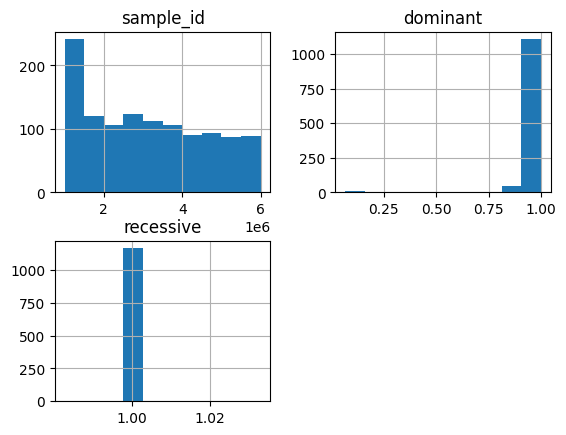

In [22]:
TSC2_df[TSC2_df['sample_id'].isin(disease_eid)].hist()

array([[<AxesSubplot:title={'center':'sample_id'}>,
        <AxesSubplot:title={'center':'dominant'}>],
       [<AxesSubplot:title={'center':'recessive'}>, <AxesSubplot:>]],
      dtype=object)

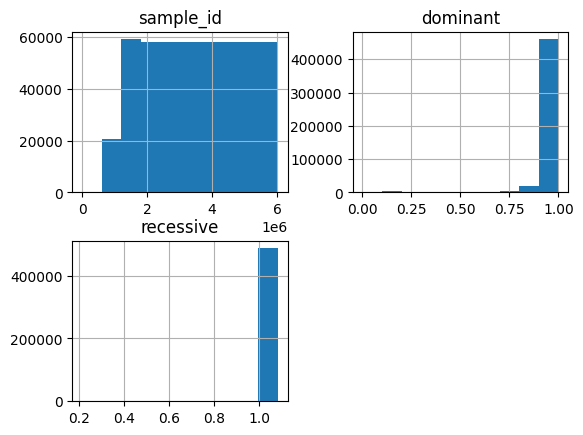

In [23]:
# TSC2_df.hist()
